In [1]:
%run "C:/Users/alibs/NeuroFieldzDev Dropbox/Ali DrBox/Work/Research/Neurotechnology/Python/Jupyter/Functions/amd_ph2_functions.py"

# standard lib
import pickle as pk
import os, pathlib 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from heapq import nlargest
import statistics as st
from scipy.signal import find_peaks
import warnings

# neurofieldz
import neurodot_data
from neurodot_data import configurator

In [2]:
# Analysis and Parameters Settings:

# Subject Info:
condition  = 'Early stage dry AMD - AREDS Stage 1' #Healthy  #Multiple Sclerosis #Optic Neuritis #ON-Neurosarcoidosis-Cataract (Glasses)
# Control - non-AMD (Age-matched)- AREDS Stage 0
# Early stage dry AMD - AREDS Stage 1
# Intermediate stage dry AMD - AREDS Stage 3
# Advanced stage- AMD- AREDS stages 4/5
# Subclinical conditions
# Non-AMD Maculapathy (Mimics AMD)

# Make a directory for saving plots:
# try:
#     os.mkdir(results_path)
# except FileExistsError:
#     print("Note: 'postprocessing' folder already exists.")

# EEG_SCALE_MICROVOLTS = 1e-6

# load the configuration settings:
EXP_NAME        = r"2022-05-11-SN002_amd_ph2_141-MESOPIC_ll-0.7_5min_PHOTOPIC_3min_DATVEP_PO3-4_x2_a12_ll-3p30"
SESSION_PATH    = os.path.join(r"C:\Users\alibs\NeuroFieldzDev Dropbox\amd_ph2_all\datasets\MES-FF-DAR V3", EXP_NAME)
CONFIG_PATH_dar = r"C:\Users\alibs\NeuroFieldzDev Dropbox\amd_ph2_all\config_DAR_V3.2.py"
# 2022-03-08-SN001_ABJ_NEU-001_DATVEP2_PO3-4_x2_a12_ll-3p25__LABEL - NEU-001 (ABJ) control, male, age 34

# 2022-03-16-SN001_amd_ph2_109-DATVEP_PO3-4_x2_a12_ll-3p30
# 2022-03-16-SN002_amd_ph2_110-DATVEP_PO3-4_x2_a12_ll-3p30
# 2022-03-16-SN003_amd_ph2_111-DATVEP_PO3-4_x2_a12_ll-3p30_TOUCHED_HEADSET_A_LOT
# 2022-03-16-SN004_amd_ph2_112-DATVEP_PO3-4_x2_a12_ll-3p30

# 2022-03-23-SN001_amd_ph2_113-DATVEP_PO3-4_x2_a12_ll-3p30
# 2022-03-23-SN002_amd_ph2_114-DATVEP_PO3-4_x2_a12_ll-3p30_EVENT_TRACKING_NEEDS_REPAIR
# 2022-03-23-SN003_amd_ph2_116-DATVEP_PO3-4_x2_a12_ll-3p30

# 2022-03-30-SN001_amd_ph2_117-DATVEP_PO3-4_x2_a12_ll-3p30_POOR_FIXATION_NOT_VALID
# 2022-03-30-SN002_amd_ph2_118-DATVEP_PO3-4_x2_a12_ll-3p30
# 2022-03-30-SN003_amd_ph2_119-DATVEP_PO3-4_x2_a12_ll-3p30
# 2022-03-30-SN004_amd_ph2_120-DATVEP_PO3-4_x2_a12_ll-3p30

# 2022-04-06-SN001_amd_ph2_121-DATVEP_PO3-4_x2_a12_ll-3p30
# 2022-04-06-SN002_amd_ph2_122-DATVEP_PO3-4_x2_a12_ll-3p30
# 2022-04-06-SN003_amd_ph2_123-DATVEP_PO3-4_x2_a12_ll-3p30
# 2022-04-06-SN004_amd_ph2_124-DATVEP_PO3-4_x2_a12_ll-3p30
# 2022-04-06-SN005_amd_ph2_125-DATVEP_PO3-4_x2_a12_ll-3p30

# 2022-04-13-SN001_amd_ph2_126-MESOPIC_ll-0.7_5min_PHOTOPIC_3min_DATVEP_PO3-4_x2_a12_ll-3p30
# 2022-04-13-SN002_amd_ph2_127-MESOPIC_ll-0.7_5min_PHOTOPIC_3min_DATVEP_PO3-4_x2_a12_ll-3p30
# 2022-04-13-SN003_amd_ph2_129-MESOPIC_ll-0.7_5min_PHOTOPIC_3min_DATVEP_PO3-4_x2_a12_ll-3p30
# 2022-04-13-SN004_amd_ph2_115-MESOPIC_ll-0.7_5min_PHOTOPIC_3min_DATVEP_PO3-4_x2_a12_ll-3p30

# 2022-04-12-SN001_SS-MESOPIC_ll-0.7_PHOTOPIC_3min_DATVEP_PO3-4_x2_a12_ll-3p30__LABEL - NEU-003 (SS) control, male, age 65
# 2022-04-11-SN001_CWV-MESOPIC_ll0_5min_PHOTOPIC_3min_DATVEP_PO3-4_x2_a12_ll-3p30__LABEL - NEU-002 (CWV) control, male, age 38

config_dar = configurator.load_abspath_config(CONFIG_PATH_dar)
print("\n".join(name for name in dir(config_dar) if not name.startswith("__")))


# - - - - - - - - - - - - -
#    Overload Settings    :
# - - - - - - - - - - - - -
config_dar.AnalysisSettings.DEBUG_PLOTS = False
config_dar.AnalysisSettings.DEBUG_PLOTS_INTERACTIVE = False
config_dar.AnalysisSettings.PLOT_INTERACTIVE_TIMEDOMAIN = False


AnalysisSettings
CleanupSettings
ComparisonSettings
VisualizationSettings
local_dir
modpath


INFO:SessionData:Logger session start on 2022-05-17
INFO:SessionData:	debug: False
INFO:neurodot_data.paradigms.DATVEP2.analysis.DataProcess: ### PROCESS BY MEASUREMENT GROUPS
INFO:neurodot_data.paradigms.DATVEP2.analysis.DataProcess:Checking sequence integrity: TODO
INFO:neurodot_data.paradigms.DATVEP2.analysis.DataProcess:Checking sequence integrity: TODO
INFO:neurodot_data.paradigms.DATVEP2.analysis.DataProcess:Checking sequence integrity: TODO
INFO:neurodot_data.paradigms.DATVEP2.analysis.DataProcess:Checking sequence integrity: TODO
c:\users\alibs\neurofieldzdev dropbox\ali drbox\work\research\neurotechnology\python\github\neurodot-data\python\neurodot_data\core\analysis.py:901: RuntimeWarning: Mean of empty slice.
  zcim = zci.mean()
C:\Users\alibs\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\alibs\anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarn

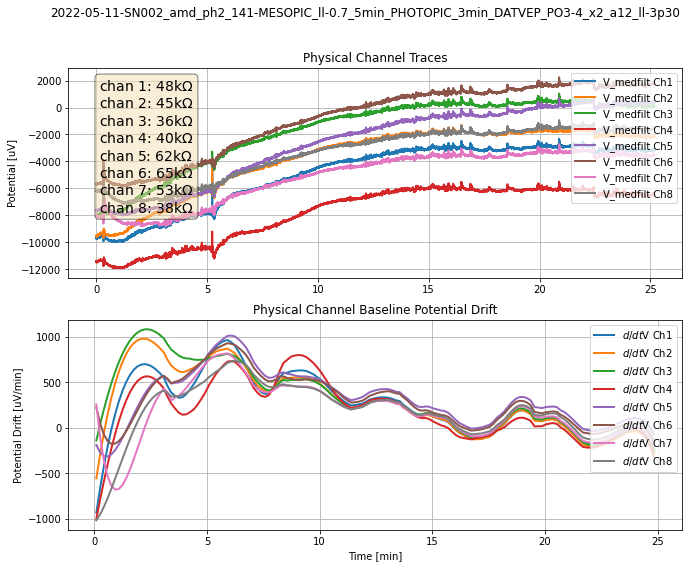

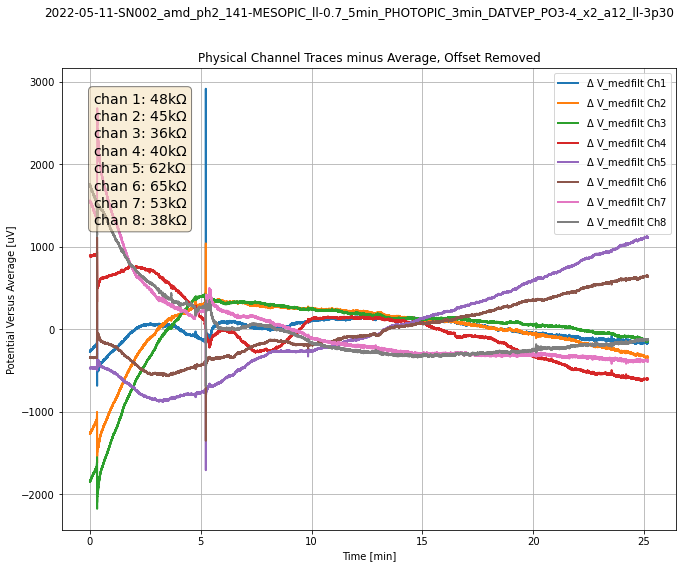

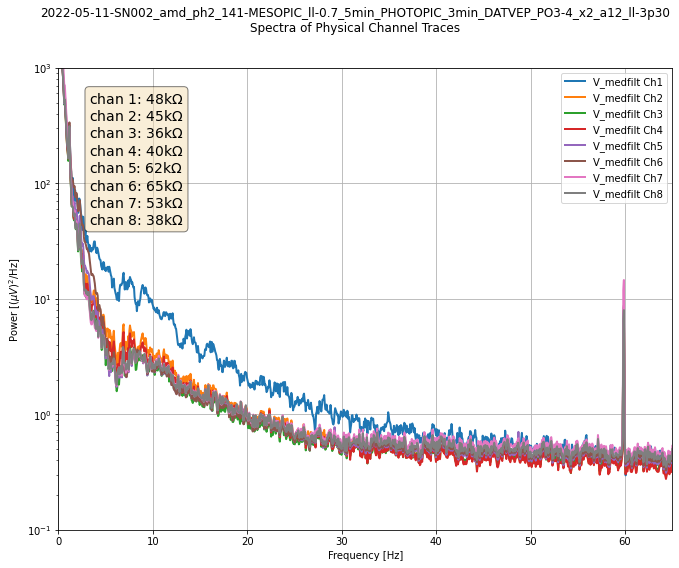

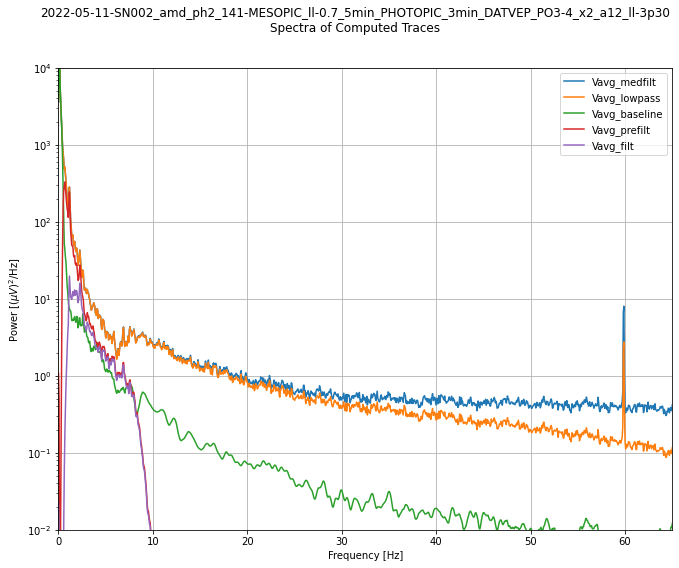

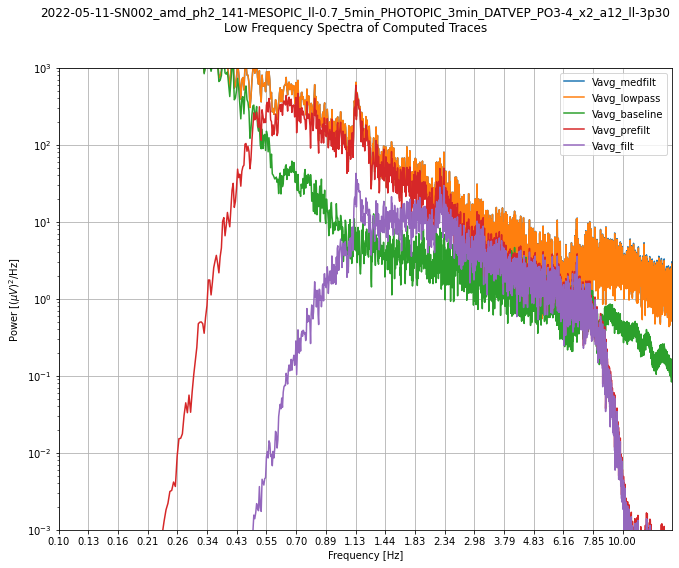

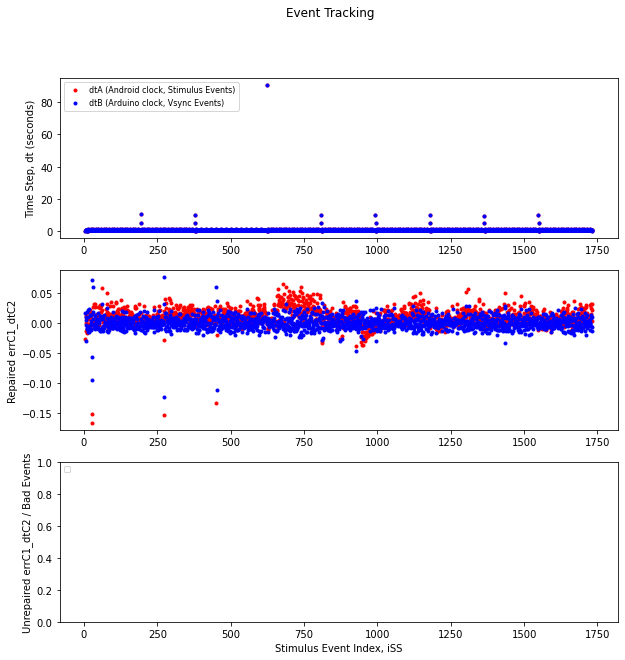

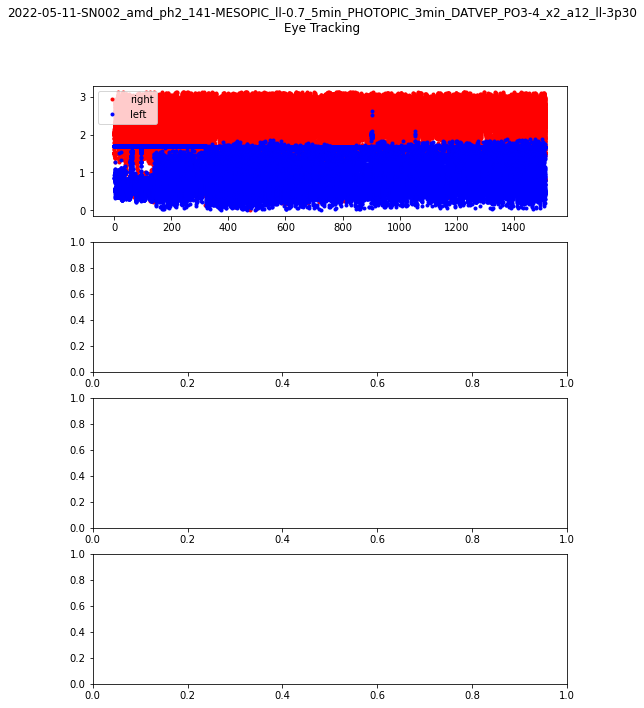

In [3]:
# ANALYSIS:
# Specify and load the analysis module from MFVEP paradigm plug-in:
modpath = "{}.analysis".format(config_dar.AnalysisSettings.PARADIGM)
mod = configurator.chain_import(modpath)
AP = mod.DataProcess(session_path=str(SESSION_PATH),config=config_dar)

# Run the analysis phase, which should produce session_path/mfvep/measurements.pkl
# NOTE may take a while to run, and only needs to be re-run if the config.AnalysisSettings are changed
AP.process()

In [4]:
# VISUALIZE:
# Specify and load the visualization module from MFVEP paradigm plug-in
modpath = "{}.visualization".format(config_dar.VisualizationSettings.PARADIGM)
mod = configurator.chain_import(modpath)
VP = mod.DataProcess(session_path=str(SESSION_PATH),config=config_dar)

# Run the processing code
# NOTE that the file session_path/mfvep/measurements.pkl is needed
VP.load_measurements()
VP.load_viz_params()
VP.recompute_measurement_groups()

SIGNAL_KEYS = ['EEG','Vavg_input']
WINDOW_SIZE = 100#121#61
WINDOW_STEP = 2#5#7#3

# Avoid the spectra plot:
plt.close()

In [5]:
# Specify and load the visualization module and DAR_plotter module from DATVEP2 paradigm plug-in
modpath = "{}.{}_plotter".format(config_dar.VisualizationSettings.PARADIGM,config_dar.VisualizationSettings.PLOTTER_TYPE)
plotter_mod = configurator.chain_import(modpath)
plotter = plotter_mod.Plotter(VP=VP)


data = {}
for meas_name, meas_group in VP.M['meas_groups'].items():
    data[meas_name] = plotter.get_window_filtered_signal_trials(meas_group,SIGNAL_KEYS,window_size=WINDOW_SIZE,window_step=WINDOW_STEP)

# Avoid the warnings from Craig's code:
warnings.filterwarnings('ignore')

In [6]:
# Preparing the dataset for functions:
# response window:
resp_start = 200 # translates to 0 [ms]
resp_end   = 801 # translates to 601 [ms]

# Data:
v_m_l = pd.DataFrame(data['left-macular']).iloc[resp_start:resp_end, :]
v_p_l = pd.DataFrame(data['left-peripheral']).iloc[resp_start:resp_end, :]
v_m_r = pd.DataFrame(data['right-macular']).iloc[resp_start:resp_end, :]
v_p_r = pd.DataFrame(data['right-peripheral']).iloc[resp_start:resp_end, :]

all_vs = [v_m_l, v_p_l, v_m_r, v_p_r]

# method: elevated (Bringing up all responses (Taking into account the deep to peak distance)
min_val = abs(min(v_m_l.min().min(),
                  v_p_l.min().min(),
                  v_m_r.min().min(),
                  v_p_r.min().min()))

for i in range(4):
    all_vs[i] = all_vs[i] + min_val

Note: 'DAVEP Analysis' folder already exists.
Note: 'DAVEP Analysis' folder already exists.
Note: 'DAVEP Analysis' folder already exists.


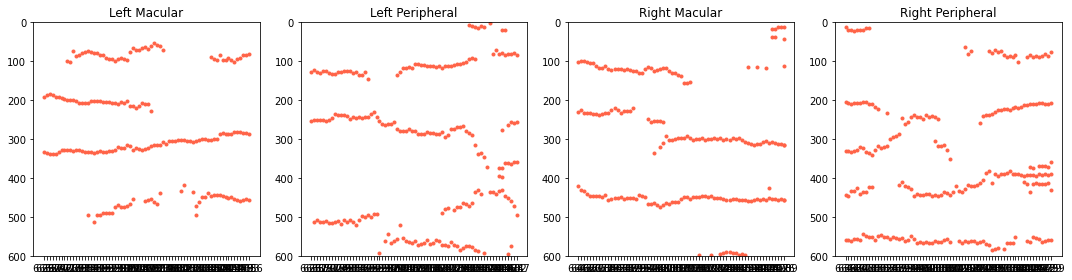

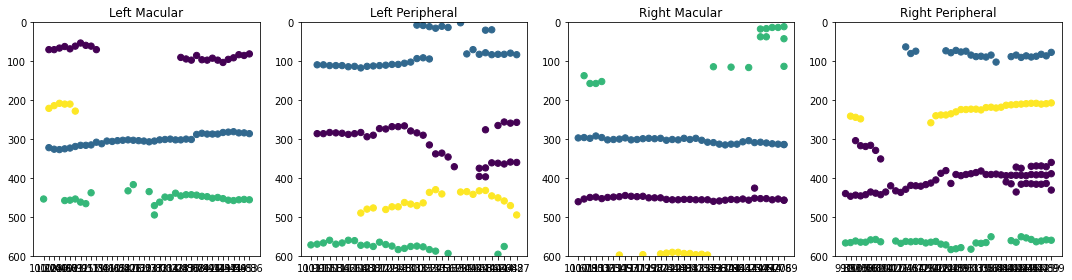

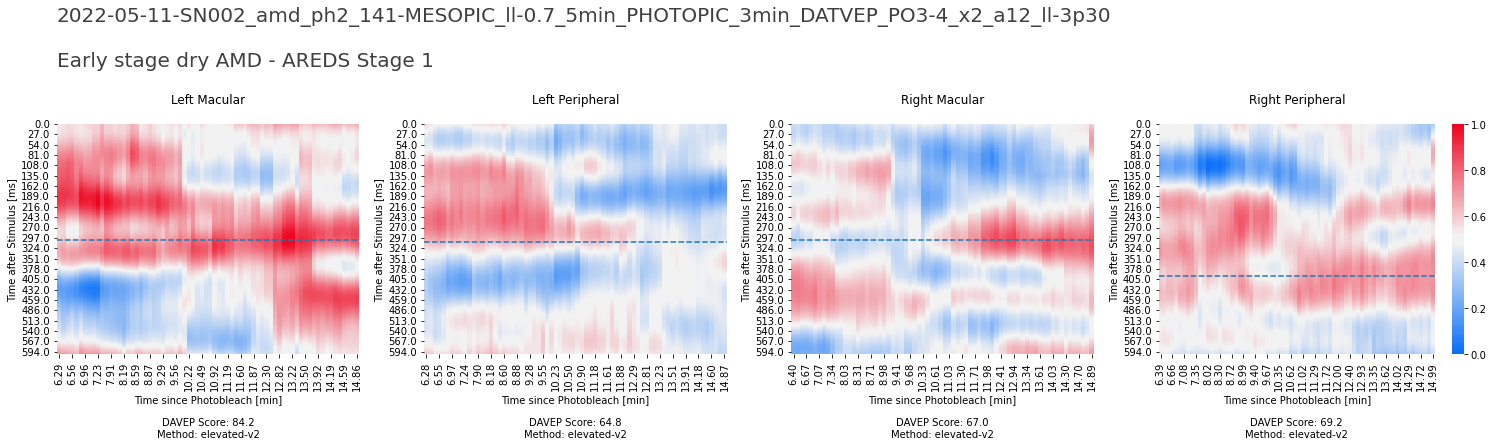

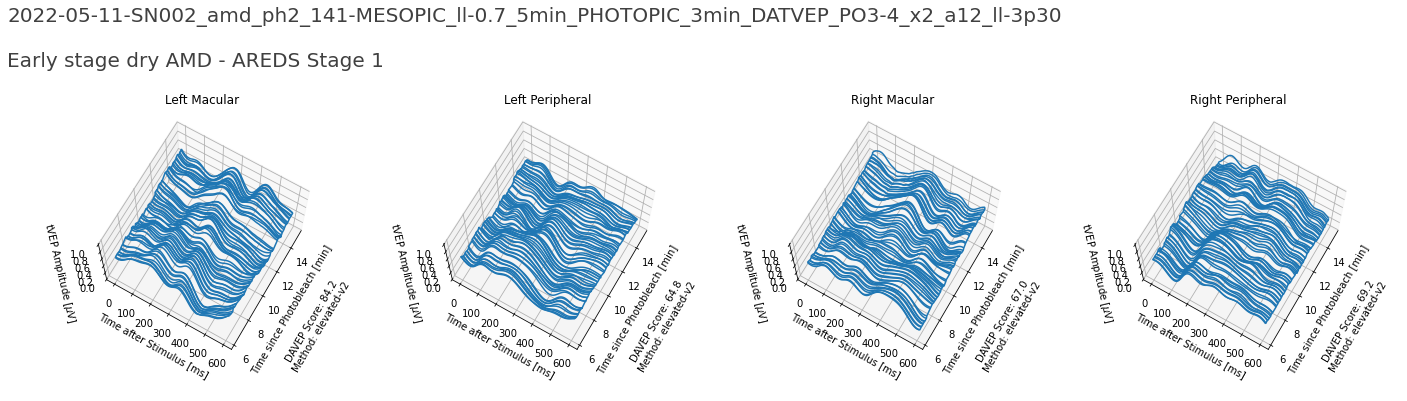

In [7]:
# I. Finding the responses and calculating the scores:
subject_id = 140
peaks = find_trial_peaks(all_vs=all_vs, plot_path=SESSION_PATH, subject_id=subject_id, plot_size=(15,4), show_plots=True)
centers = find_components(peak_loc=peaks, plot_path=SESSION_PATH, subject_id=subject_id, n_lm=4, n_lp=4, n_rm=4, n_rp=4,
                          cl_search='half', plot_size=(15,4), show_plots=True)
response_info, davep_scores, max_val = find_davep_score(all_vs=all_vs, centers=centers,
                                                        resp_window_half=75, cs_start=290, cs_end=600,
                                                        method='elevated-v2') # 'normal'

# II. Heatmap and wireframe plots:
plot_heatmap(all_vs=all_vs, response_info=response_info, davep_scores=davep_scores,
             max_val=max_val, plot_label=VP.M['subject_label'], condition=condition,
             plot_path=SESSION_PATH, subject_id=subject_id, score_method='elevated-v2', sep=10, show_plots=True)
plot_wireframe(all_vs=all_vs, response_info=response_info, davep_scores=davep_scores,
             max_val=max_val, plot_label=VP.M['subject_label'], condition=condition,
             plot_path=SESSION_PATH, subject_id=subject_id, score_method='elevated-v2', plot_angles=[70, 30], show_plots=True)

In [9]:
response_info, davep_scores, max_val

(array([[418, 343, 493],
        [387, 312, 462],
        [440, 365, 515],
        [358, 283, 433]]),
 array([57.1, 50.2, 69.1, 84.1]),
 4.4591333573984855)

In [226]:
for i in range(4):
    all_vs[i][all_vs[i]<0.5*max_val]=0
    all_vs[i]=all_vs[i][all_vs[i]-(0.5*max_val)]

# v_m_l[v_m_l<0.1*max_val]=0
# v_p_l[v_p_l<0.1*max_val]=0
# v_m_r[v_m_r<0.1*max_val]=0
# v_p_r[v_p_r<0.1*max_val]=0

ValueError: Boolean array expected for the condition, not float64

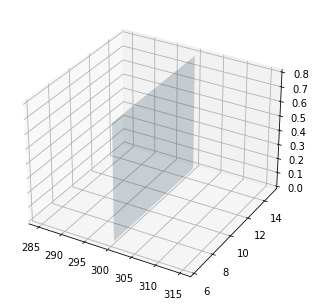

In [196]:
fig = plt.figure(figsize=(6, 4))
YY, ZZ = np.meshgrid(all_vs[0].columns.astype(float), np.arange(0, 1, 0.2))
X=300
ax = fig.add_axes([.8, 0, 1, 1], projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.2)
plt.show()